<a href="https://colab.research.google.com/github/sharinair14/Basic-ML-Practice/blob/master/Simple_linear_regression_using_statmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
ad_data = pd.read_csv('/content/Advertising.csv',index_col=0)



In [5]:
ad_data.head()

,TV,radio,newspaper,sales
Index,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
ad_data.shape

(200, 4)

In [7]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [8]:
ad_data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [9]:
ad_data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


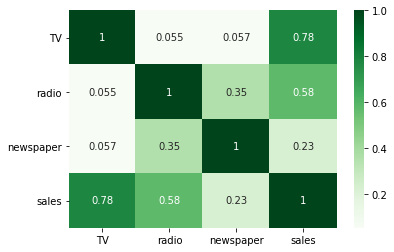

In [10]:
sns.heatmap(ad_data.corr(),annot=True,cmap="Greens")

Sales is correlated to TV.So taking TV as independent feature and sales as dependent.

In [11]:
X=ad_data['TV']
y=ad_data['sales']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [13]:
X_train.shape

(160,)

In [14]:
y_train.shape

(160,)

In [15]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


y('sales')=coefficient * x('TV') + intercept

In [16]:
X_train_cons = sm.add_constant(X_train)

In [17]:
model = sm.OLS(y_train,X_train_cons).fit()

In [18]:
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.602   
Dependent Variable: sales            AIC:                840.2076
Date:               2020-11-04 06:06 BIC:                846.3579
No. Observations:   160              Log-Likelihood:     -418.10 
Df Model:           1                F-statistic:        241.3   
Df Residuals:       158              Prob (F-statistic): 1.26e-33
R-squared:          0.604            Scale:              11.034  
--------------------------------------------------------------------
         Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const    7.0959      0.5346    13.2741    0.0000    6.0401    8.1518
TV       0.0479      0.0031    15.5338    0.0000    0.0418    0.0540
-----------------------------------------------------------------
Omnibus:               0.632        Durbin-Watson:          2.107
Prob(Omnibus

In [19]:
model.params

const    7.095947
TV       0.047904
dtype: float64

Sales=  0.046450('TV) + 7.092292





Regression line

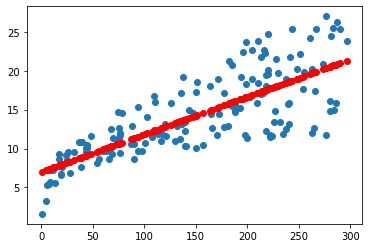

In [20]:
plt.scatter(X_train,y_train)  #actual 
plt.scatter(X_train,0.048197*X_train + 7.005525,color='red')   #best fit line

Distribution of Error Term

In [21]:
ypred = model.predict(X_train_cons)
residual = y_train - ypred  #residual = actual - predicted

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Error')

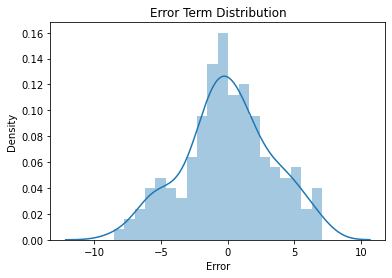

In [22]:
plt.title("Error Term Distribution")
sns.distplot(residual,bins=20)
plt.xlabel('Error')

In this case  error terms are normally distributed with mean 0.

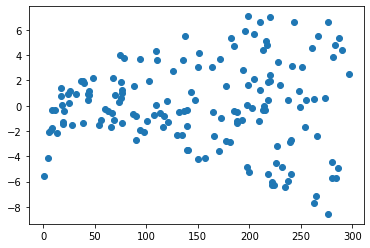

In [23]:
# Distribution of data and residuals
plt.scatter(X_train,residual)

Now prediction on test data

In [24]:
X_test_cons=sm.add_constant(X_test)
ypred_test=model.predict(X_test_cons)

Check RMSE & R2 score

In [25]:
from sklearn.metrics import mean_squared_error,r2_score
print('RMSE is ',np.sqrt(mean_squared_error(y_test,ypred_test)))

RMSE is  3.008661239977795


In [26]:
print('R2 Score is',r2_score(y_test,ypred_test))

R2 Score is 0.6132389846419608


Visualizing fit on test data

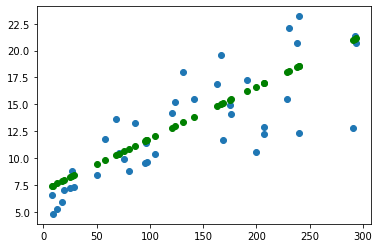

In [27]:
plt.scatter(X_test,y_test)
plt.scatter(X_test,0.048197*X_test + 7.005525,color='green')




**Considering all the three columns **

In [50]:
X_new=ad_data[['TV','radio','newspaper']]
y_new=ad_data['sales']

In [51]:
X_new_train,X_new_test,y_new_train,y_new_test = train_test_split(X_new,y_new,test_size=0.3)

In [52]:
X_new_train_cons = sm.add_constant(X_new_train)

In [53]:
model1=sm.OLS(y_new_train,X_new_train_cons).fit()

In [54]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     375.1
Date:                Wed, 04 Nov 2020   Prob (F-statistic):           1.49e-65
Time:                        07:09:42   Log-Likelihood:                -271.97
No. Observations:                 140   AIC:                             551.9
Df Residuals:                     136   BIC:                             563.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9527      0.388      7.604      0.0

Since p value for newspaper is greater than 0.05 so we should remove this column.

In [55]:
X_new_train_cons=X_new_train_cons.drop('newspaper',axis=1)

In [56]:
model2=sm.OLS(y_new_train,X_new_train_cons).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     566.3
Date:                Wed, 04 Nov 2020   Prob (F-statistic):           5.82e-67
Time:                        07:09:56   Log-Likelihood:                -272.02
No. Observations:                 140   AIC:                             550.0
Df Residuals:                     137   BIC:                             558.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9087      0.363      8.011      0.0

In [57]:
model2.params

const    2.908651
TV       0.046804
radio    0.182613
dtype: float64

y(sales)=2.977849 + 0.044714* TV + 0.188479 * radio





In [58]:
X_new_test=sm.add_constant(X_new_test)

In [59]:
X_new_test=X_new_test.drop('newspaper',axis=1)

In [60]:
ypred1_test=model2.predict(X_new_test)

In [62]:
print('RMSE is ',np.sqrt(mean_squared_error(y_new_test,ypred1_test)))

RMSE is  1.6348979411407452


In [63]:
print('R2 Score is',r2_score(y_new_test,ypred1_test))

R2 Score is 0.9065753917234041
